In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
  
df = pd.read_csv("./car_evaluation.csv")

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
print(df.isnull().sum())  

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


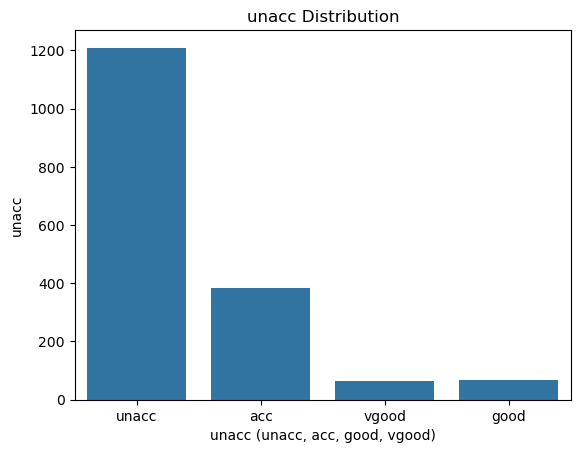

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='unacc', data=df)
plt.title("unacc Distribution")
plt.xlabel("unacc (unacc, acc, good, vgood)")
plt.ylabel("unacc")
plt.show()

print(df['unacc'].value_counts())

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']  

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head()) 

   vhigh  vhigh.1  2  2.1  small  low  unacc
0      3        3  0    0      2    2  unacc
1      3        3  0    0      2    0  unacc
2      3        3  0    0      1    1  unacc
3      3        3  0    0      1    2  unacc
4      3        3  0    0      1    0  unacc


In [15]:
X=df.drop('unacc',axis=1)
X.head()

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [17]:
y=df['unacc']
y.value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9682080924855492
[[ 70   1   6   0]
 [  1  10   0   3]
 [  0   0 239   0]
 [  0   0   0  16]]


In [25]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9710982658959537
[[ 72   0   5   0]
 [  0  12   0   2]
 [  0   0 239   0]
 [  3   0   0  13]]


In [27]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6907514450867052
[[ 18   0  55   4]
 [  2   0  12   0]
 [ 16   0 221   2]
 [  4   0  12   0]]


In [29]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9017341040462428
[[ 57   2  18   0]
 [  7   5   0   2]
 [  5   0 234   0]
 [  0   0   0  16]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf_knn = KNeighborsClassifier(n_neighbors=5) 
clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)

print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.8901734104046243
[[ 56   0  21   0]
 [  7   5   1   1]
 [  1   0 238   0]
 [  4   0   3   9]]
